In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json
import wbdata
from sklearn.cluster import KMeans 
import pylab as pl


In [2]:
path = r"C:\Users\ryani\Desktop\Data Analyst COURSE\Data Immersion\E6 - Dashboards and Analytics\UN_DATASET"

In [3]:
df_UN = pd.read_csv (os.path.join(path, '03 Prepared Data', 'UN_df_cleaned.csv'))
df_UN

SortOrder  LocID  Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
0           143      4    NaN       AFG        AF          4          4   
1           143      4    NaN       AFG        AF          4          4   
2           143      4    NaN       AFG        AF          4          4   
3           143      4    NaN       AFG        AF          4          4   
4           143      4    NaN       AFG        AF          4          4   
...         ...    ...    ...       ...       ...        ...        ...   
2315         83    716    NaN       ZWE        ZW        716          4   
2316         83    716    NaN       ZWE        ZW        716          4   
2317         83    716    NaN       ZWE        ZW        716          4   
2318         83    716    NaN       ZWE        ZW        716          4   
2319         83    716    NaN       ZWE        ZW        716          4   

       LocTypeName  ParentID     Location  ...  Q0060Male Q0060Female  \
0     Country/Area      5501  Afghanistan  ...   274.4609    224.8054   
1     Country/Area      5501  Afghanistan  ...   278.3373    229.1277   
2     Country/Area      5501  Afghanistan  ...   288.3504    233.7682   
3     Country/Area      5501  Afghanistan  ...   434.9700    291.2585   
4     Country/Area      5501  Afghanistan  ...   395.8878    275.1640   
...            ...       ...          ...  ...        ...         ...   
2315  Country/Area       910     Zimbabwe  ...   430.3308    353.8247   
2316  Country/Area       910     Zimbabwe  ...   427.9629    360.0455   
2317  Country/Area       910     Zimbabwe  ...   439.0037    374.3302   
2318  Country/Area       910     Zimbabwe  ...   445.2774    386.7537   
2319  Country/Area       910     Zimbabwe  ...   456.8205    404.9676   

         Q1550  Q1550Male  Q1550Female     Q1560  Q1560Male  Q1560Female  \
0     101.7436   110.5445      92.7252  198.4914   221.6256     175.9458   
1     103.7876   112.5256      94.8531  201.1085   224.2414     178.7562   
2     108.9153   120.5091      97.0285  207.2249   233.3923     181.8401   
3     187.4871   243.1744     126.7582  316.9767   388.2573     239.8960   
4     160.4519   201.7709     116.2911  284.3806   344.7921     221.3018   
...        ...        ...          ...       ...        ...          ...   
2315  209.8813   234.9024     190.9142  347.4430   389.2870     313.5975   
2316  211.7529   232.9385     195.8469  349.1253   385.7373     319.5930   
2317  220.8267   241.7148     205.0532  360.9658   395.5178     333.0355   
2318  229.5361   246.6502     216.6720  369.5281   400.3307     344.6680   
2319  240.6517   255.9804     228.9698  383.5534   410.1757     362.0620   

      NetMigrations    CNMR  
0           -44.089  -1.034  
1           -48.958  -1.181  
2          -647.402 -15.954  
3          -548.784 -13.719  
4           143.634   3.676  
...             ...     ...  
2315       -103.107  -6.752  
2316       -117.758  -7.833  
2317       -128.241  -8.658  
2318       -140.181  -9.601  
2319       -162.220 -11.266  

[2320 rows x 67 columns]

In [4]:
df_2020 = df_UN[df_UN['Time'] ==2020]
df_2020

SortOrder  LocID  Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
4           143      4    NaN       AFG        AF          4          4   
15          211      8    NaN       ALB        AL          8          4   
24           95     12    NaN       DZA        DZ         12          4   
35          318     16   30.0       ASM        AS         16          4   
44          212     20    NaN       AND        AD         20          4   
...         ...    ...    ...       ...       ...        ...        ...   
2274        163    704    NaN       VNM        VN        704          4   
2285        326    876    2.0       WLF        WF        876          4   
2294        182    887    NaN       YEM        YE        887          4   
2304         82    894    NaN       ZMB        ZM        894          4   
2314         83    716    NaN       ZWE        ZW        716          4   

       LocTypeName  ParentID                   Location  ...  Q0060Male  \
4     Country/Area      5501                Afghanistan  ...   395.8878   
15    Country/Area       925                    Albania  ...   124.3841   
24    Country/Area       912                    Algeria  ...   140.2547   
35    Country/Area       957             American Samoa  ...   222.4886   
44    Country/Area       925                    Andorra  ...   118.3212   
...            ...       ...                        ...  ...        ...   
2274  Country/Area       920                   Viet Nam  ...   204.7657   
2285  Country/Area       957  Wallis and Futuna Islands  ...    90.4664   
2294  Country/Area       922                      Yemen  ...   305.2686   
2304  Country/Area       910                     Zambia  ...   353.2085   
2314  Country/Area       910                   Zimbabwe  ...   422.6174   

     Q0060Female     Q1550  Q1550Male  Q1550Female     Q1560  Q1560Male  \
4       275.1640  160.4519   201.7709     116.2911  284.3806   344.7921   
15       60.8120   33.6223    46.4676      21.5870   81.9411   114.0377   
24      111.2370   44.6584    49.3664      39.6626  103.0236   115.6802   
35      131.4738   85.5955   109.2409      60.3665  168.7200   212.1297   
44       58.2937   36.1310    48.3519      23.3027   78.3671   103.1614   
...          ...       ...        ...          ...       ...        ...   
2274     86.1982   67.3834    99.5223      34.1841  121.7586   175.9670   
2285     92.2328   28.4194    26.2516      30.1834   77.4316    80.7712   
2294    190.2223  108.9115   143.9324      71.4124  210.5138   265.1054   
2304    254.5448  134.8540   161.8714     107.3523  251.2828   299.6490   
2314    338.2390  192.9791   218.2564     173.7727  336.6228   383.0992   

      Q1560Female  NetMigrations    CNMR  
4        221.3018        143.634   3.676  
15        51.4945        -16.680  -5.808  
24        89.4811        -10.798  -0.245  
35       121.6719         -0.653 -13.123  
44        51.6024          0.572   7.394  
...           ...            ...     ...  
2274      66.6094         -6.457  -0.066  
2285      74.5675         -0.071  -6.112  
2294     151.9646        -97.982  -2.712  
2304     203.3872          8.156   0.428  
2314     299.0072        -89.440  -5.760  

[232 rows x 67 columns]

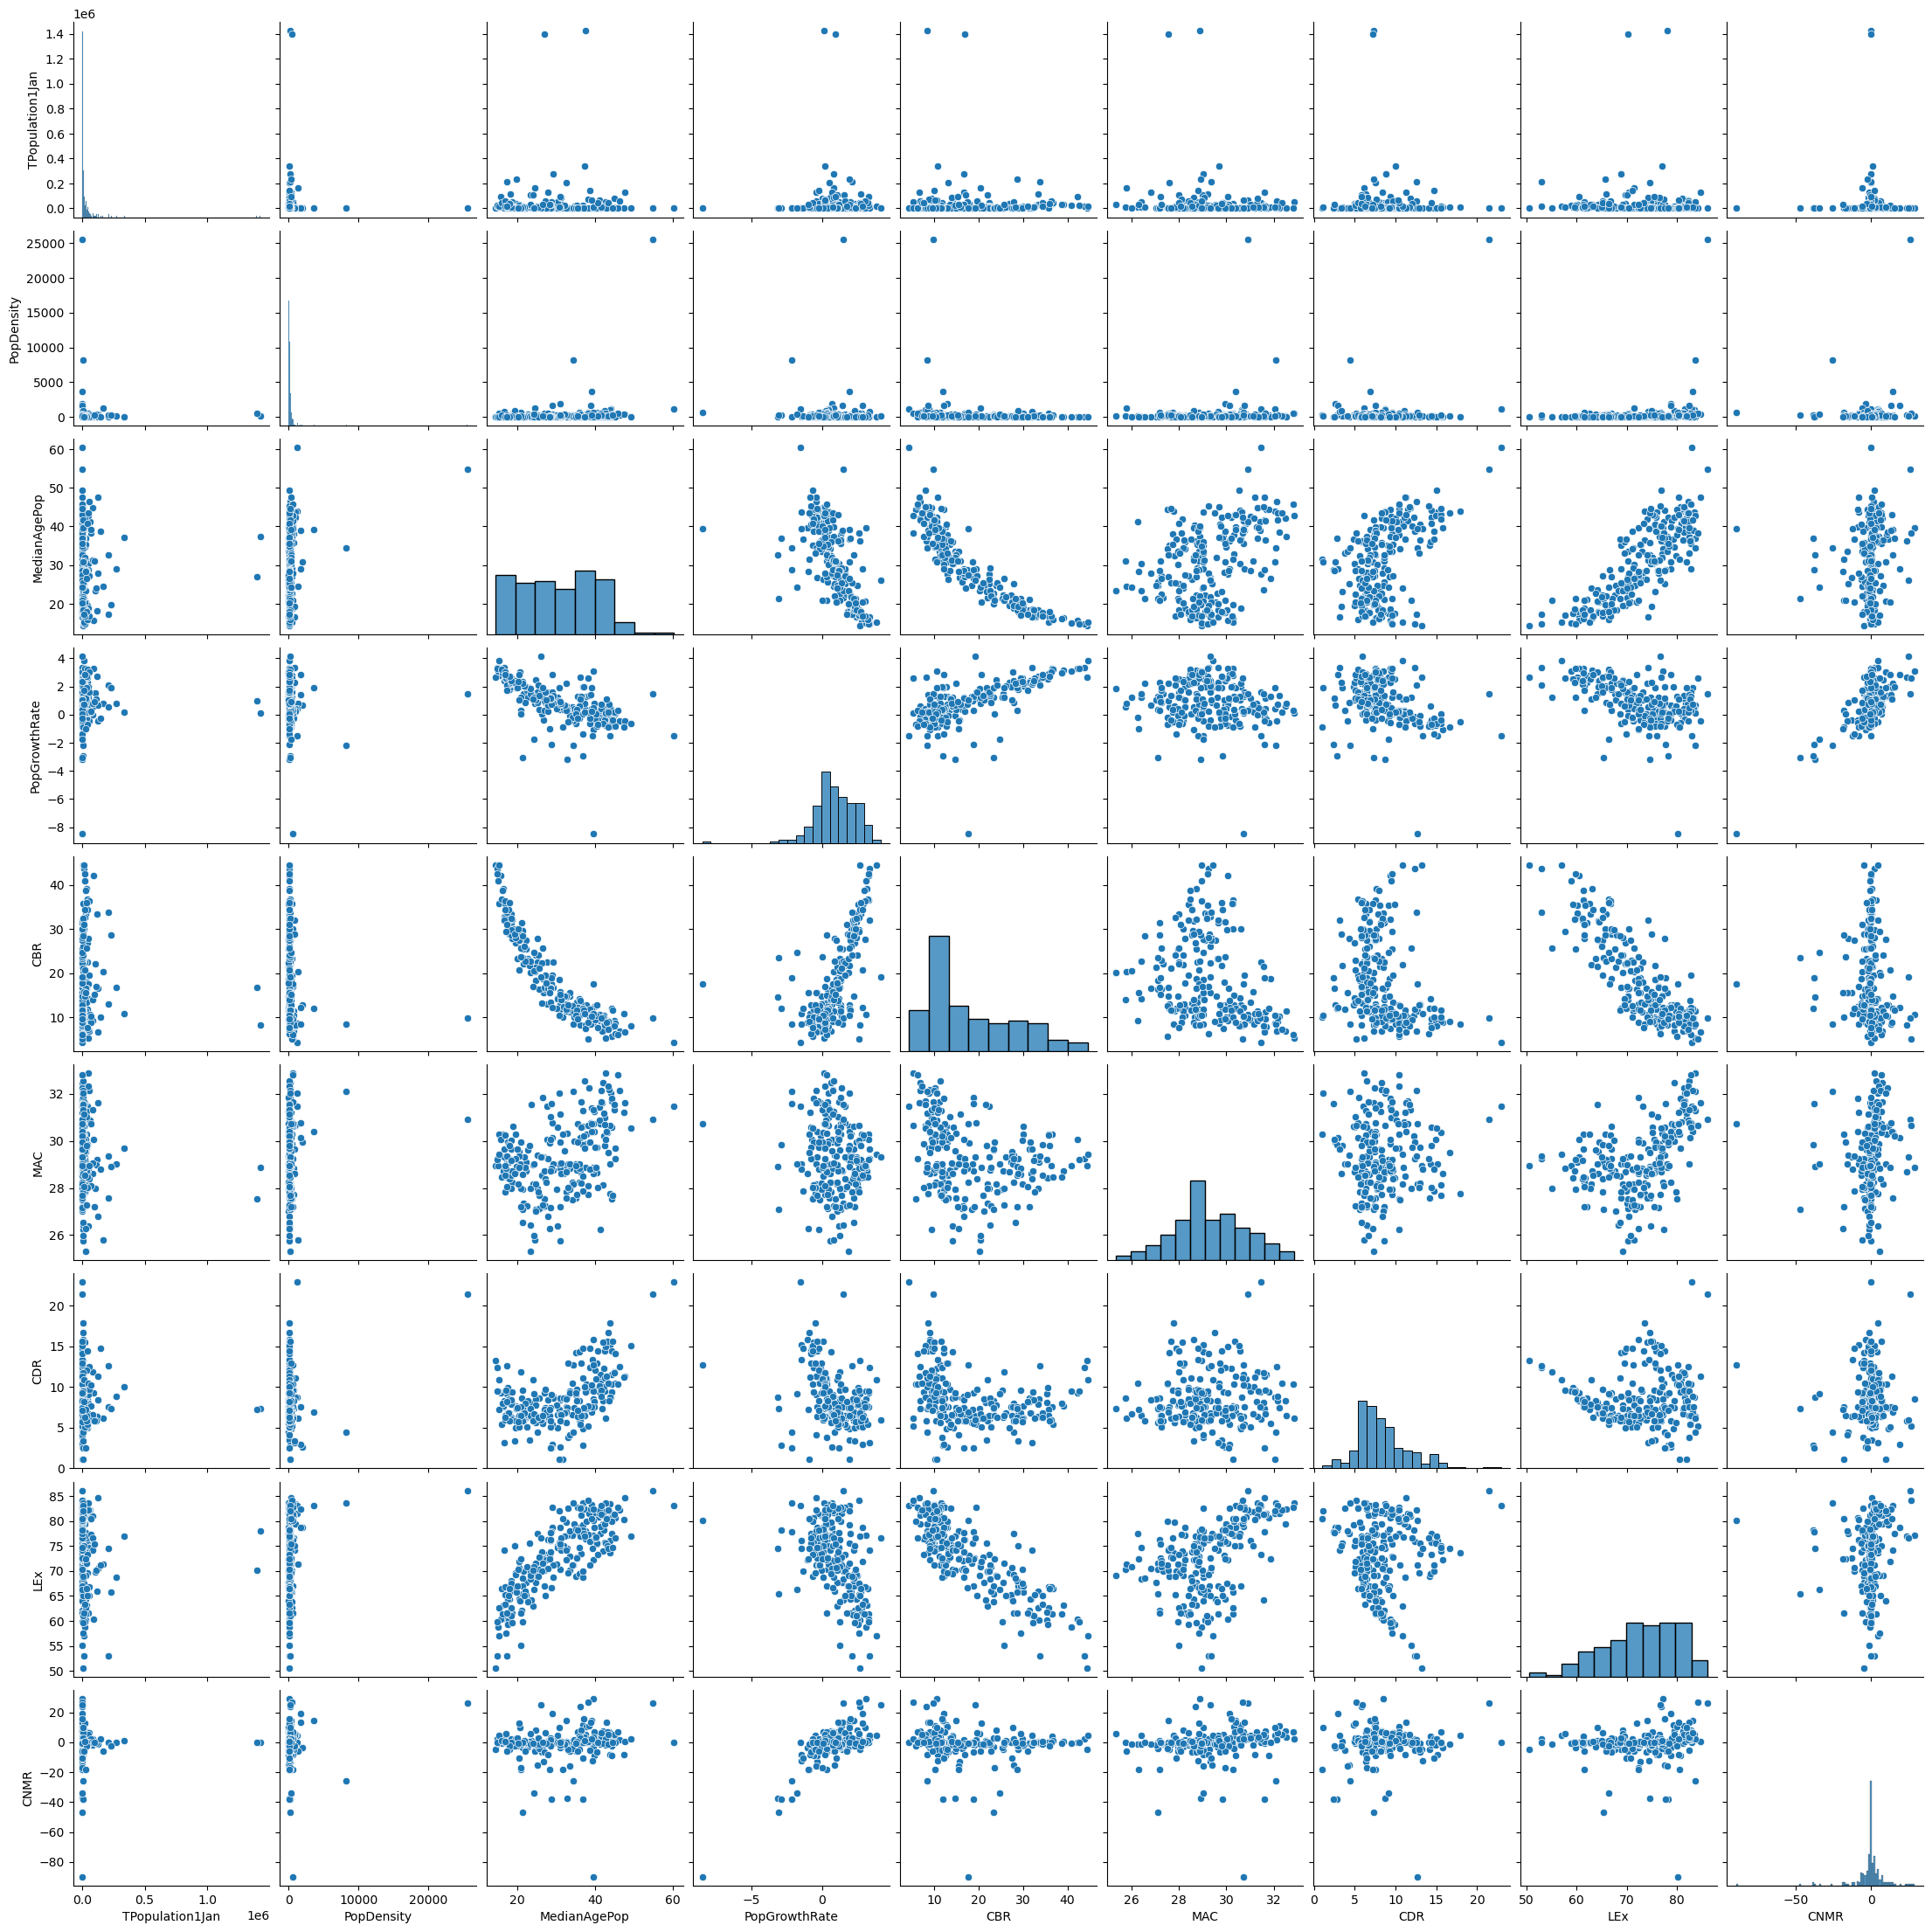

In [5]:
df_pairplot = df_2020 [['TPopulation1Jan', 'PopDensity', 'MedianAgePop', 'PopGrowthRate', 'CBR','MAC', 'CDR', 'LEx', 'CNMR']]
pairplot = sns.pairplot(df_pairplot)

## 'CDR', 'MedianAgePop', 'LEx' -- look good

In [6]:
df_2020.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [7]:
df_2020_cl = df_2020[['MedianAgePop', 'CDR', 'LEx', 'CBR', 'MAC']]
df_2020_cl

MedianAgePop    CDR      LEx     CBR     MAC
4          16.4109  7.565  61.4537  36.601  30.275
15         35.1271  9.080  77.8241  10.536  29.009
24         27.6080  5.988  73.2568  22.430  31.476
35         26.6667  6.350  72.6717  15.658  29.322
44         42.1248  8.285  79.4177   6.831  32.489
...            ...    ...      ...     ...     ...
2274       31.0268  5.813  75.3832  15.234  27.208
2285       35.5896  7.157  78.1637   9.566  29.939
2294       18.0622  5.832  66.4354  35.895  29.784
2304       16.9361  6.260  63.3607  34.408  28.551
2314       17.3626  8.138  61.5300  30.988  28.069

[232 rows x 5 columns]

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_2020_cl).score(df_2020_cl) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\ryani\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ryani\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ryani\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ryani\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

[-58682.41143529688,
 -19659.487395835506,
 -12502.078474435695,
 -9741.719724566516,
 -8295.163369588152,
 -7306.585674554444,
 -6768.664590082212,
 -5855.736523874254,
 -5216.118321702688]

In [10]:
score

[-58682.41143529688,
 -19659.487395835506,
 -12502.078474435695,
 -9741.719724566516,
 -8295.163369588152,
 -7306.585674554444,
 -6768.664590082212,
 -5855.736523874254,
 -5216.118321702688]

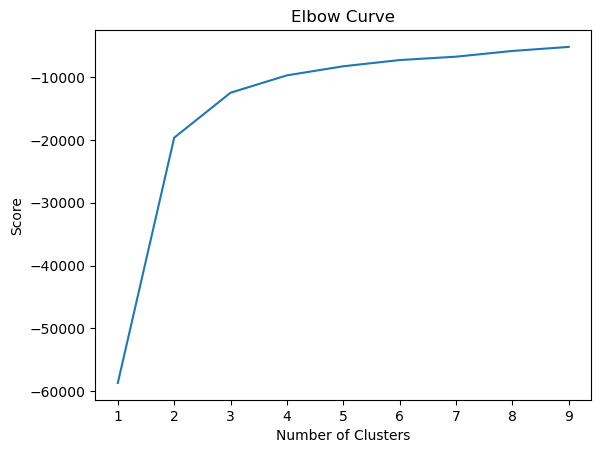

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
# Explain why you chose that number in a markdown cell.
# If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

## 4 clusters might still be OK even though it is beginning to flatten out.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_2020_cl)

C:\Users\ryani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
df_2020_cl['clusters'] = kmeans.fit_predict(df_2020_cl)

C:\Users\ryani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryani\AppData\Local\Temp\ipykernel_26348\3158662406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_cl['clusters'] = kmeans.fit_predict(df_2020_cl)


In [15]:
df_2020_cl.head()

MedianAgePop    CDR      LEx     CBR     MAC  clusters
4        16.4109  7.565  61.4537  36.601  30.275         2
15       35.1271  9.080  77.8241  10.536  29.009         3
24       27.6080  5.988  73.2568  22.430  31.476         1
35       26.6667  6.350  72.6717  15.658  29.322         1
44       42.1248  8.285  79.4177   6.831  32.489         0

In [16]:
df_2020_cl['clusters'].value_counts()

clusters
3    67
0    65
1    51
2    49
Name: count, dtype: int64

In [17]:
df_2020

SortOrder  LocID  Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
4           143      4    NaN       AFG        AF          4          4   
15          211      8    NaN       ALB        AL          8          4   
24           95     12    NaN       DZA        DZ         12          4   
35          318     16   30.0       ASM        AS         16          4   
44          212     20    NaN       AND        AD         20          4   
...         ...    ...    ...       ...       ...        ...        ...   
2274        163    704    NaN       VNM        VN        704          4   
2285        326    876    2.0       WLF        WF        876          4   
2294        182    887    NaN       YEM        YE        887          4   
2304         82    894    NaN       ZMB        ZM        894          4   
2314         83    716    NaN       ZWE        ZW        716          4   

       LocTypeName  ParentID                   Location  ...  Q0060Male  \
4     Country/Area      5501                Afghanistan  ...   395.8878   
15    Country/Area       925                    Albania  ...   124.3841   
24    Country/Area       912                    Algeria  ...   140.2547   
35    Country/Area       957             American Samoa  ...   222.4886   
44    Country/Area       925                    Andorra  ...   118.3212   
...            ...       ...                        ...  ...        ...   
2274  Country/Area       920                   Viet Nam  ...   204.7657   
2285  Country/Area       957  Wallis and Futuna Islands  ...    90.4664   
2294  Country/Area       922                      Yemen  ...   305.2686   
2304  Country/Area       910                     Zambia  ...   353.2085   
2314  Country/Area       910                   Zimbabwe  ...   422.6174   

     Q0060Female     Q1550  Q1550Male  Q1550Female     Q1560  Q1560Male  \
4       275.1640  160.4519   201.7709     116.2911  284.3806   344.7921   
15       60.8120   33.6223    46.4676      21.5870   81.9411   114.0377   
24      111.2370   44.6584    49.3664      39.6626  103.0236   115.6802   
35      131.4738   85.5955   109.2409      60.3665  168.7200   212.1297   
44       58.2937   36.1310    48.3519      23.3027   78.3671   103.1614   
...          ...       ...        ...          ...       ...        ...   
2274     86.1982   67.3834    99.5223      34.1841  121.7586   175.9670   
2285     92.2328   28.4194    26.2516      30.1834   77.4316    80.7712   
2294    190.2223  108.9115   143.9324      71.4124  210.5138   265.1054   
2304    254.5448  134.8540   161.8714     107.3523  251.2828   299.6490   
2314    338.2390  192.9791   218.2564     173.7727  336.6228   383.0992   

      Q1560Female  NetMigrations    CNMR  
4        221.3018        143.634   3.676  
15        51.4945        -16.680  -5.808  
24        89.4811        -10.798  -0.245  
35       121.6719         -0.653 -13.123  
44        51.6024          0.572   7.394  
...           ...            ...     ...  
2274      66.6094         -6.457  -0.066  
2285      74.5675         -0.071  -6.112  
2294     151.9646        -97.982  -2.712  
2304     203.3872          8.156   0.428  
2314     299.0072        -89.440  -5.760  

[232 rows x 67 columns]

In [18]:
df_2020.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

In [19]:
df_2020_cl.shape

(232, 6)

In [20]:
df_2020_cl.nunique()['LEx']

np.int64(232)

In [21]:
df_2020.shape

(232, 67)

In [22]:
#all columns
pd.set_option('display.max_columns', None)


In [23]:
df_2020_LEx = df_2020_cl.drop(columns=['MedianAgePop', 'CDR', 'CBR', 'MAC'])
df_2020_LEx

LEx  clusters
4     61.4537         2
15    77.8241         3
24    73.2568         1
35    72.6717         1
44    79.4177         0
...       ...       ...
2274  75.3832         3
2285  78.1637         3
2294  66.4354         2
2304  63.3607         2
2314  61.5300         2

[232 rows x 2 columns]

In [24]:
df_2020 = df_2020.merge(df_2020_LEx, on=['LEx'], how='left')
df_2020

SortOrder  LocID  Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
0          143      4    NaN       AFG        AF          4          4   
1          211      8    NaN       ALB        AL          8          4   
2           95     12    NaN       DZA        DZ         12          4   
3          318     16   30.0       ASM        AS         16          4   
4          212     20    NaN       AND        AD         20          4   
..         ...    ...    ...       ...       ...        ...        ...   
227        163    704    NaN       VNM        VN        704          4   
228        326    876    2.0       WLF        WF        876          4   
229        182    887    NaN       YEM        YE        887          4   
230         82    894    NaN       ZMB        ZM        894          4   
231         83    716    NaN       ZWE        ZW        716          4   

      LocTypeName  ParentID                   Location  VarID Variant  Time  \
0    Country/Area      5501                Afghanistan      2  Medium  2020   
1    Country/Area       925                    Albania      2  Medium  2020   
2    Country/Area       912                    Algeria      2  Medium  2020   
3    Country/Area       957             American Samoa      2  Medium  2020   
4    Country/Area       925                    Andorra      2  Medium  2020   
..            ...       ...                        ...    ...     ...   ...   
227  Country/Area       920                   Viet Nam      2  Medium  2020   
228  Country/Area       957  Wallis and Futuna Islands      2  Medium  2020   
229  Country/Area       922                      Yemen      2  Medium  2020   
230  Country/Area       910                     Zambia      2  Medium  2020   
231  Country/Area       910                   Zimbabwe      2  Medium  2020   

     TPopulation1Jan  TPopulation1July  TPopulationMale1July  \
0          38429.950         39068.979             19725.450   
1           2878.203          2871.954              1421.407   
2          43685.420         44042.091             22490.324   
3             49.855            49.761                25.170   
4             77.149            77.380                39.386   
..               ...               ...                   ...   
227        97620.404         98079.191             48017.590   
228           11.632            11.616                 5.586   
229        35640.680         36134.864             18304.570   
230        18787.069         19059.395              9433.237   
231        15394.209         15526.888              7370.588   

     TPopulationFemale1July  PopDensity  PopSexRatio  MedianAgePop  NatChange  \
0                 19343.529     60.1713     101.9744       16.4109   1134.429   
1                  1450.547    104.8235      97.9911       35.1271      4.181   
2                 21551.767     18.4916     104.3549       27.6080    724.135   
3                    24.592    248.8075     102.3524       26.6667      0.463   
4                    37.994    164.6383     103.6637       42.1248     -0.112   
..                      ...         ...          ...           ...        ...   
227               50061.601    312.9431      95.9170       31.0268    924.034   
228                   6.029     82.9714      92.6528       35.5896      0.028   
229               17830.293     68.4411     102.6599       18.0622   1086.339   
230                9626.158     25.6385      97.9959       16.9361    536.487   
231                8156.300     40.1367      90.3668       17.3626    354.792   

     NatChangeRT  PopChange  PopGrowthRate  DoublingTime    Births  \
0         29.036   1278.058          3.272       21.1842  1429.983   
1          1.456    -12.499         -0.435           NaN    30.258   
2         16.442    713.342          1.620       42.7869   987.851   
3          9.308     -0.187         -0.376           NaN     0.779   
4         -1.454      0.462          0.597      116.1051     0.529   
..   

In [25]:
df_cluster = df_UN.merge(df_2020, on=['ISO3_code'], how='inner')
df_cluster

SortOrder_x  LocID_x  Notes_x ISO3_code ISO2_code_x  SDMX_code_x  \
0             143        4      NaN       AFG          AF            4   
1             143        4      NaN       AFG          AF            4   
2             143        4      NaN       AFG          AF            4   
3             143        4      NaN       AFG          AF            4   
4             143        4      NaN       AFG          AF            4   
...           ...      ...      ...       ...         ...          ...   
2315           83      716      NaN       ZWE          ZW          716   
2316           83      716      NaN       ZWE          ZW          716   
2317           83      716      NaN       ZWE          ZW          716   
2318           83      716      NaN       ZWE          ZW          716   
2319           83      716      NaN       ZWE          ZW          716   

      LocTypeID_x LocTypeName_x  ParentID_x   Location_x  VarID_x Variant_x  \
0               4  Country/Area        5501  Afghanistan        2    Medium   
1               4  Country/Area        5501  Afghanistan        2    Medium   
2               4  Country/Area        5501  Afghanistan        2    Medium   
3               4  Country/Area        5501  Afghanistan        2    Medium   
4               4  Country/Area        5501  Afghanistan        2    Medium   
...           ...           ...         ...          ...      ...       ...   
2315            4  Country/Area         910     Zimbabwe        2    Medium   
2316            4  Country/Area         910     Zimbabwe        2    Medium   
2317            4  Country/Area         910     Zimbabwe        2    Medium   
2318            4  Country/Area         910     Zimbabwe        2    Medium   
2319            4  Country/Area         910     Zimbabwe        2    Medium   

      Time_x  TPopulation1Jan_x  TPopulation1July_x  TPopulationMale1July_x  \
0       2024          42044.654           42647.492               21532.540   
1       2023          40864.868           41454.761               20924.078   
2       2022          40292.816           40578.842               20475.675   
3       2021          39708.008           40000.412               20186.456   
4       2020          38429.950           39068.979               19725.450   
...      ...                ...                 ...                     ...   
2315    2019          15148.526           15271.368                7243.442   
2316    2018          14920.378           15034.452                7125.471   
2317    2017          14704.586           14812.482                7015.107   
2318    2016          14496.002           14600.294                6909.792   
2319    2015          14302.024           14399.013                6810.139   

      TPopulationFemale1July_x  PopDensity_x  PopSexRatio_x  MedianAgePop_x  \
0                    21114.952       65.6827       101.9777         17.1159   
1                    20530.683       63.8457       101.9161         16.9404   
2                    20103.167       62.4967       101.8530         16.7517   
3                    19813.956       61.6058       101.8800         16.5753   
4                    19343.529       60.1713       101.9744         16.4109   
...                        ...           ...            ...             ...   
2315                  8027.926       39.4762        90.2281         17.1868   
2316                  7908.981       38.8638        90.0934         17.0221   
2317                  7797.375       38.2900        89.9675         16.8776   
2318                  7690.502       37.7415        89.8484         16.7720   
2319                  7588.874       37.2212        89.7385         16.7289   

      NatChange_x  NatChangeRT_x  PopChange_x  PopGrowthRate_x  \
0        1249.770         29.305     1205.676            2.827   
1        1228.733         29.640     1179.786            2.846   
2        1219.461         30.052      572.052            1.410   
3     

In [26]:
df_cluster.value_counts('clusters')

clusters
3    670
0    650
1    510
2    490
Name: count, dtype: int64

In [27]:
# remove any trailing "_x" or "_y"
df_cluster.columns = df_cluster.columns.str.replace(r'_x$', '', regex=True)
df_cluster

SortOrder  LocID  Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
0           143      4    NaN       AFG        AF          4          4   
1           143      4    NaN       AFG        AF          4          4   
2           143      4    NaN       AFG        AF          4          4   
3           143      4    NaN       AFG        AF          4          4   
4           143      4    NaN       AFG        AF          4          4   
...         ...    ...    ...       ...       ...        ...        ...   
2315         83    716    NaN       ZWE        ZW        716          4   
2316         83    716    NaN       ZWE        ZW        716          4   
2317         83    716    NaN       ZWE        ZW        716          4   
2318         83    716    NaN       ZWE        ZW        716          4   
2319         83    716    NaN       ZWE        ZW        716          4   

       LocTypeName  ParentID     Location  VarID Variant  Time  \
0     Country/Area      5501  Afghanistan      2  Medium  2024   
1     Country/Area      5501  Afghanistan      2  Medium  2023   
2     Country/Area      5501  Afghanistan      2  Medium  2022   
3     Country/Area      5501  Afghanistan      2  Medium  2021   
4     Country/Area      5501  Afghanistan      2  Medium  2020   
...            ...       ...          ...    ...     ...   ...   
2315  Country/Area       910     Zimbabwe      2  Medium  2019   
2316  Country/Area       910     Zimbabwe      2  Medium  2018   
2317  Country/Area       910     Zimbabwe      2  Medium  2017   
2318  Country/Area       910     Zimbabwe      2  Medium  2016   
2319  Country/Area       910     Zimbabwe      2  Medium  2015   

      TPopulation1Jan  TPopulation1July  TPopulationMale1July  \
0           42044.654         42647.492             21532.540   
1           40864.868         41454.761             20924.078   
2           40292.816         40578.842             20475.675   
3           39708.008         40000.412             20186.456   
4           38429.950         39068.979             19725.450   
...               ...               ...                   ...   
2315        15148.526         15271.368              7243.442   
2316        14920.378         15034.452              7125.471   
2317        14704.586         14812.482              7015.107   
2318        14496.002         14600.294              6909.792   
2319        14302.024         14399.013              6810.139   

      TPopulationFemale1July  PopDensity  PopSexRatio  MedianAgePop  \
0                  21114.952     65.6827     101.9777       17.1159   
1                  20530.683     63.8457     101.9161       16.9404   
2                  20103.167     62.4967     101.8530       16.7517   
3                  19813.956     61.6058     101.8800       16.5753   
4                  19343.529     60.1713     101.9744       16.4109   
...                      ...         ...          ...           ...   
2315                8027.926     39.4762      90.2281       17.1868   
2316                7908.981     38.8638      90.0934       17.0221   
2317                7797.375     38.2900      89.9675       16.8776   
2318                7690.502     37.7415      89.8484       16.7720   
2319                7588.874     37.2212      89.7385       16.7289   

      NatChange  NatChangeRT  PopChange  PopGrowthRate  DoublingTime  \
0      1249.770       29.305   1205.676          2.827       24.5188   
1      1228.733       29.640   1179.786          2.846       24.3551   
2      1219.461       30.052    572.052          1.410       49.1594   
3      1133.586       28.340    584.808          1.462       47.4109   
4      1134.429       29.036   1278.058          3.272       21.1842   
...         ...          ...        ...            ...           ...   
2315    348.802       22.840    245.683          1.609       43.0794   
2316    345.897       23.006    228.148          1.518       45.6619   
2317    344.031       23.226  

In [28]:
df_cluster.shape

(2320, 134)

In [29]:
cols_to_drop = [
    "SortOrder_y", "LocID_y", "Notes_y", "ISO2_code_y", "SDMX_code_y",
    "LocTypeID_y", "LocTypeName_y", "ParentID_y", "Location_y", "VarID_y",
    "Variant_y", "Time_y", "TPopulation1Jan_y", "TPopulation1July_y",
    "TPopulationMale1July_y", "TPopulationFemale1July_y", "PopDensity_y",
    "PopSexRatio_y", "MedianAgePop_y", "NatChange_y", "NatChangeRT_y",
    "PopChange_y", "PopGrowthRate_y", "DoublingTime_y", "Births_y",
    "Births1519_y", "CBR_y", "TFR_y", "NRR_y", "MAC_y", "SRB_y", "Deaths_y",
    "DeathsMale_y", "DeathsFemale_y", "CDR_y", "LEx_y", "LExMale_y",
    "LExFemale_y", "LE15_y", "LE15Male_y", "LE15Female_y", "LE65_y",
    "LE65Male_y", "LE65Female_y", "LE80_y", "LE80Male_y", "LE80Female_y",
    "InfantDeaths_y", "IMR_y", "LBsurvivingAge1_y", "Under5Deaths_y",
    "Q5_y", "Q0040_y", "Q0040Male_y", "Q0040Female_y", "Q0060_y",
    "Q0060Male_y", "Q0060Female_y", "Q1550_y", "Q1550Male_y",
    "Q1550Female_y", "Q1560_y", "Q1560Male_y", "Q1560Female_y",
    "NetMigrations_y", "CNMR_y"
]

df_cluster.drop(columns=cols_to_drop, errors="ignore", inplace=True)
df_cluster

SortOrder  LocID  Notes ISO3_code ISO2_code  SDMX_code  LocTypeID  \
0           143      4    NaN       AFG        AF          4          4   
1           143      4    NaN       AFG        AF          4          4   
2           143      4    NaN       AFG        AF          4          4   
3           143      4    NaN       AFG        AF          4          4   
4           143      4    NaN       AFG        AF          4          4   
...         ...    ...    ...       ...       ...        ...        ...   
2315         83    716    NaN       ZWE        ZW        716          4   
2316         83    716    NaN       ZWE        ZW        716          4   
2317         83    716    NaN       ZWE        ZW        716          4   
2318         83    716    NaN       ZWE        ZW        716          4   
2319         83    716    NaN       ZWE        ZW        716          4   

       LocTypeName  ParentID     Location  VarID Variant  Time  \
0     Country/Area      5501  Afghanistan      2  Medium  2024   
1     Country/Area      5501  Afghanistan      2  Medium  2023   
2     Country/Area      5501  Afghanistan      2  Medium  2022   
3     Country/Area      5501  Afghanistan      2  Medium  2021   
4     Country/Area      5501  Afghanistan      2  Medium  2020   
...            ...       ...          ...    ...     ...   ...   
2315  Country/Area       910     Zimbabwe      2  Medium  2019   
2316  Country/Area       910     Zimbabwe      2  Medium  2018   
2317  Country/Area       910     Zimbabwe      2  Medium  2017   
2318  Country/Area       910     Zimbabwe      2  Medium  2016   
2319  Country/Area       910     Zimbabwe      2  Medium  2015   

      TPopulation1Jan  TPopulation1July  TPopulationMale1July  \
0           42044.654         42647.492             21532.540   
1           40864.868         41454.761             20924.078   
2           40292.816         40578.842             20475.675   
3           39708.008         40000.412             20186.456   
4           38429.950         39068.979             19725.450   
...               ...               ...                   ...   
2315        15148.526         15271.368              7243.442   
2316        14920.378         15034.452              7125.471   
2317        14704.586         14812.482              7015.107   
2318        14496.002         14600.294              6909.792   
2319        14302.024         14399.013              6810.139   

      TPopulationFemale1July  PopDensity  PopSexRatio  MedianAgePop  \
0                  21114.952     65.6827     101.9777       17.1159   
1                  20530.683     63.8457     101.9161       16.9404   
2                  20103.167     62.4967     101.8530       16.7517   
3                  19813.956     61.6058     101.8800       16.5753   
4                  19343.529     60.1713     101.9744       16.4109   
...                      ...         ...          ...           ...   
2315                8027.926     39.4762      90.2281       17.1868   
2316                7908.981     38.8638      90.0934       17.0221   
2317                7797.375     38.2900      89.9675       16.8776   
2318                7690.502     37.7415      89.8484       16.7720   
2319                7588.874     37.2212      89.7385       16.7289   

      NatChange  NatChangeRT  PopChange  PopGrowthRate  DoublingTime  \
0      1249.770       29.305   1205.676          2.827       24.5188   
1      1228.733       29.640   1179.786          2.846       24.3551   
2      1219.461       30.052    572.052          1.410       49.1594   
3      1133.586       28.340    584.808          1.462       47.4109   
4      1134.429       29.036   1278.058          3.272       21.1842   
...         ...          ...        ...            ...           ...   
2315    348.802       22.840    245.683          1.609       43.0794   
2316    345.897       23.006    228.148          1.518       45.6619   
2317    344.031       23.226  

In [30]:
df_cluster.to_csv(os.path.join(path, '03 Prepared Data', 'UN_cl_cluster.csv'))

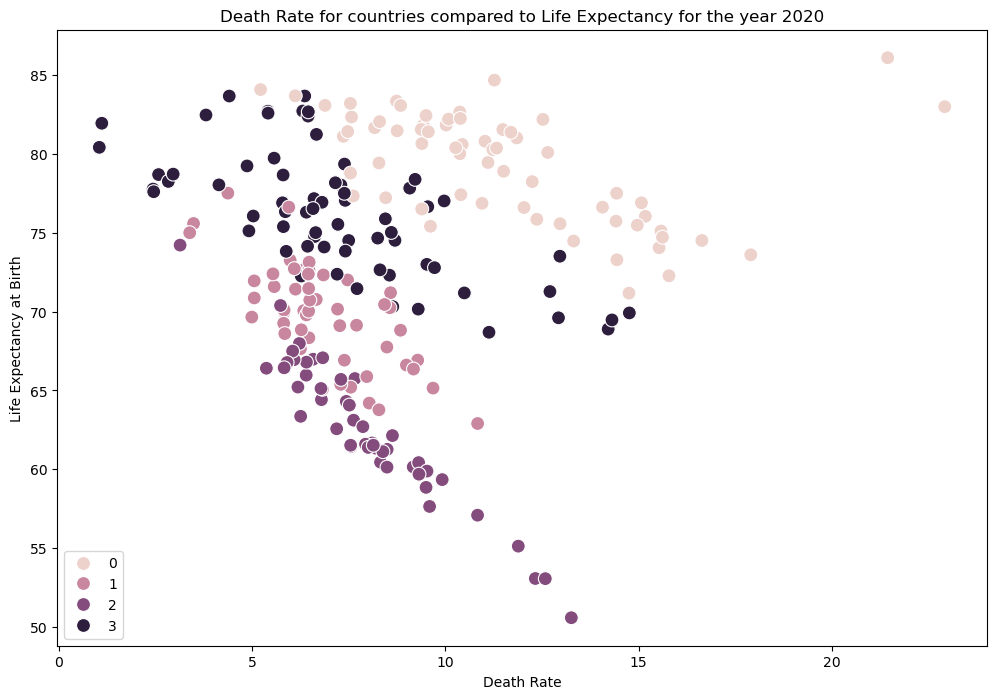

In [31]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2020_cl['CDR'], y=df_2020_cl['LEx'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Death Rate') # Label x-axis.
plt.ylabel('Life Expectancy at Birth') # Label y-axis.
plt.title('Death Rate for countries compared to Life Expectancy for the year 2020')
plt.show()

# Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
# Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

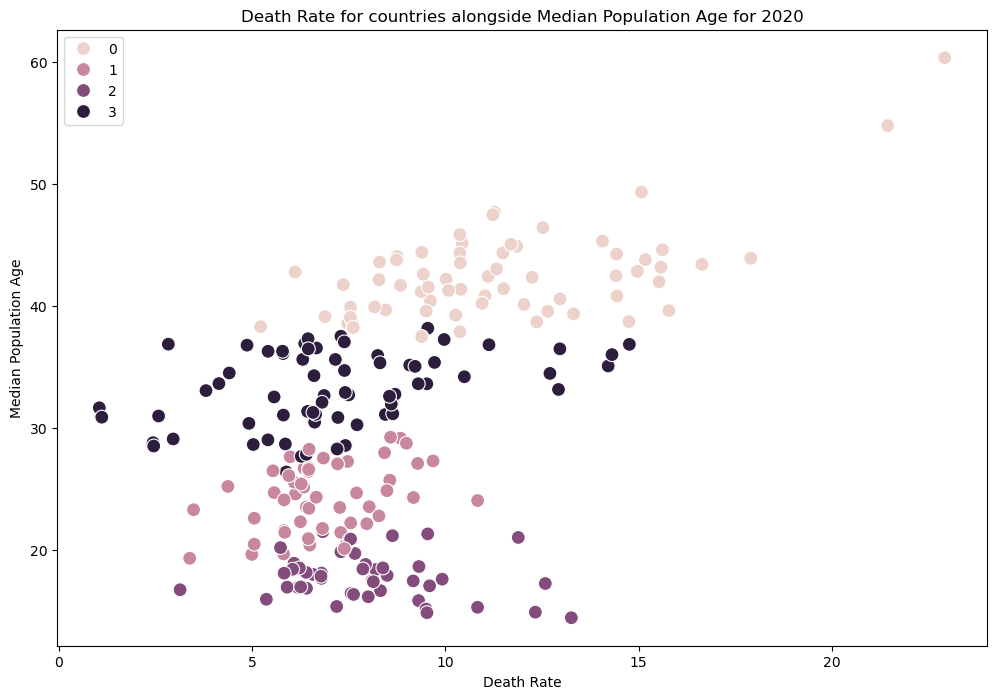

In [44]:
# Plot the clusters

age_fig = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2020_cl['CDR'], y=df_2020_cl['MedianAgePop'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Death Rate') # Label x-axis.
plt.ylabel('Median Population Age') # Label y-axis.
plt.title('Death Rate for countries alongside Median Population Age for 2020')
plt.show()

In [48]:
age_fig.savefig(os.path.join(path, '04 Visualizations', 'age_fig.png'), dpi=300, bbox_inches='tight', pad_inches=0.1)

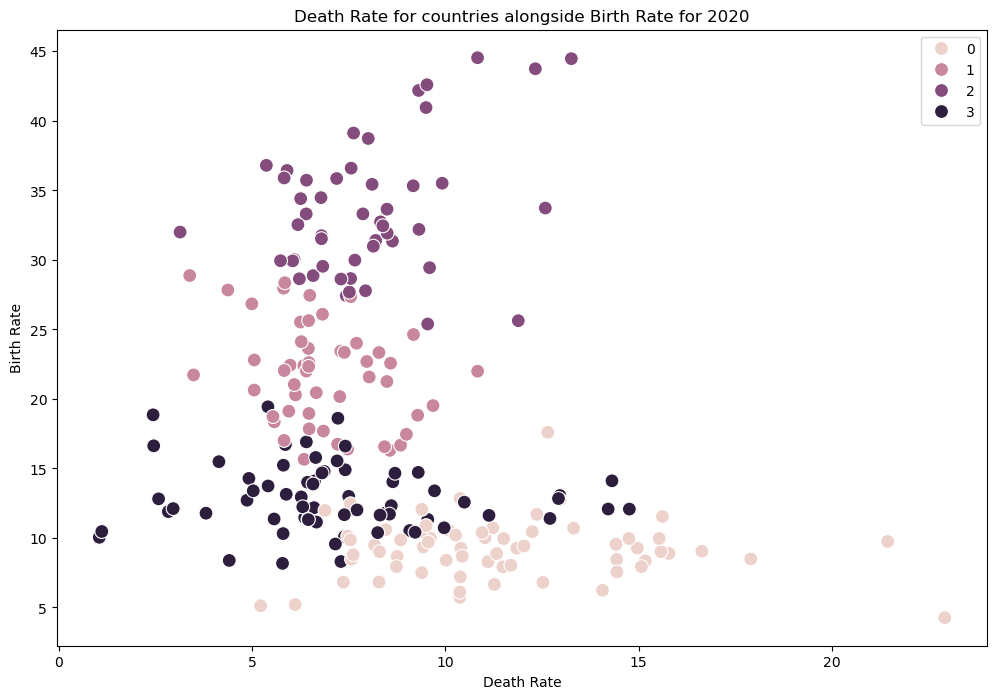

In [33]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2020_cl['CDR'], y=df_2020_cl['CBR'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Death Rate') # Label x-axis.
plt.ylabel('Birth Rate') # Label y-axis.
plt.title('Death Rate for countries alongside Birth Rate for 2020')
plt.show()

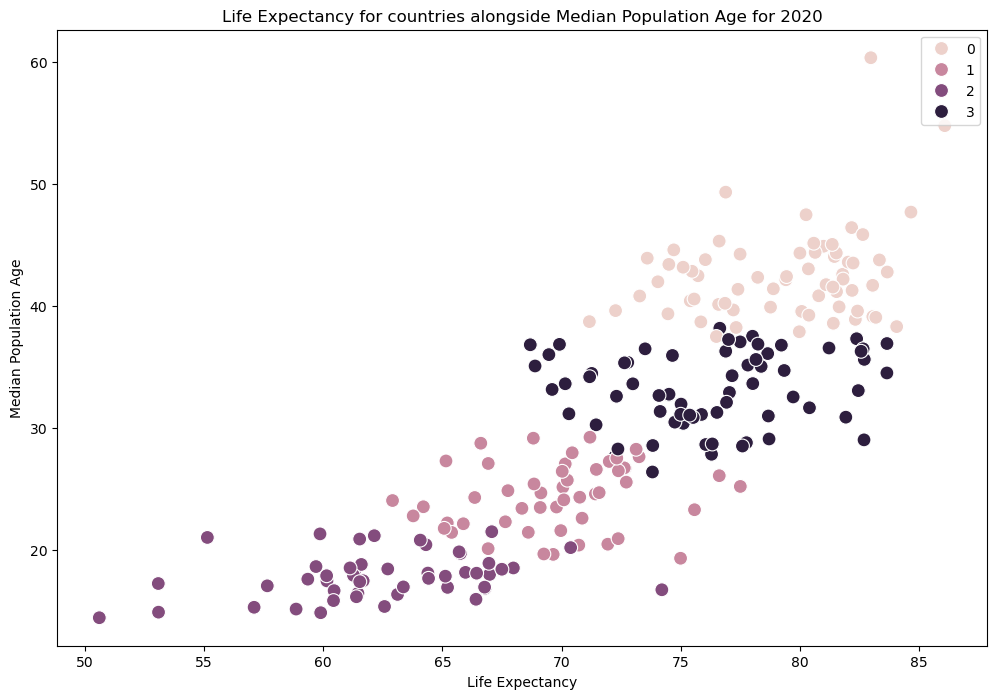

In [34]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2020_cl['LEx'], y=df_2020_cl['MedianAgePop'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Median Population Age') # Label y-axis.
plt.title('Life Expectancy for countries alongside Median Population Age for 2020')
plt.show()

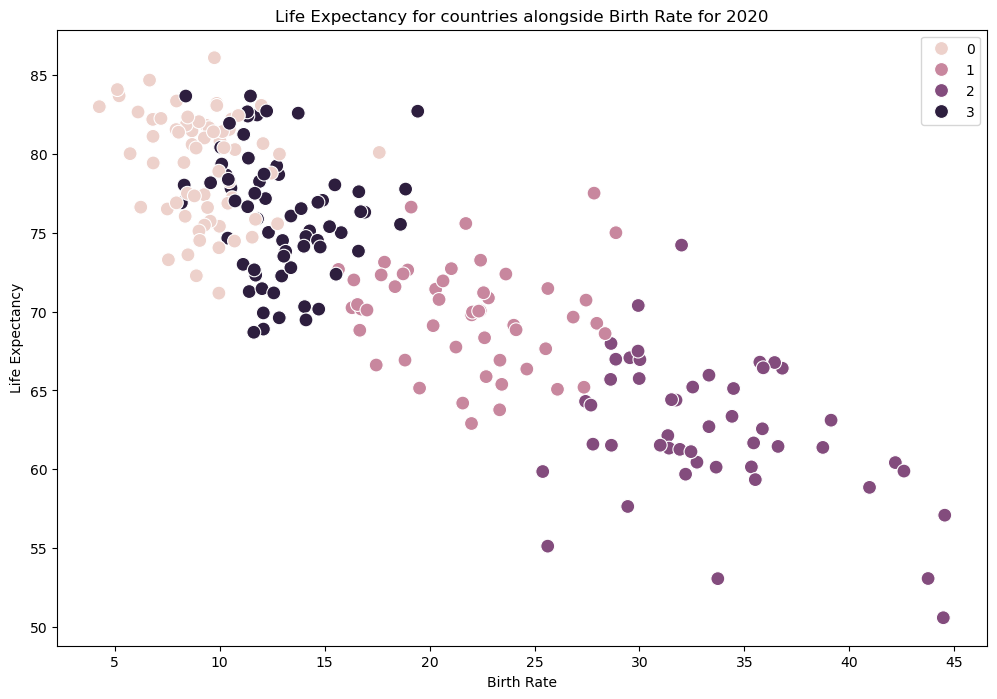

In [35]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2020_cl['CBR'], y=df_2020_cl['LEx'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Birth Rate') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.title('Life Expectancy for countries alongside Birth Rate for 2020')
plt.show()

# Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
# Note down your thoughts in a markdown cell.

## All these clusters make sense, there is very little overlap and they seem logical places to cluster the data

Some of these graphs do not need explanation as they are obvious (i.e. median age increases with life expectancy). Of particular note would be that the countries with the lowest birth rate are experiencing the most death in 2020. This was not easy to see before. 

Also - very visible to see that the countries with the highest median age are getting the most death in 2020.

Countries with the lowest birth rate have the highest life expectancy

A lot of the insights here are, I think, just leading back to median age and death

# Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [36]:
df_2020_cl.columns

Index(['MedianAgePop', 'CDR', 'LEx', 'CBR', 'MAC', 'clusters'], dtype='object')

In [37]:
df_2020_cl.groupby('clusters').agg({'MedianAgePop':['mean', 'median'], 
                                    'CDR':['mean', 'median'], 
                                    'LEx':['mean', 'median'],
                                    'CBR':['mean', 'median'], 
                                    'MAC':['mean', 'median']})

MedianAgePop                 CDR                LEx           \
                 mean   median       mean  median       mean   median   
clusters                                                                
0           42.490528  42.1248  11.418108  10.950  79.298283  80.2672   
1           24.380984  24.5578   6.850020   6.474  69.813886  70.0594   
2           17.831398  17.8169   7.972408   7.662  62.544792  62.1408   
3           33.144851  33.1295   7.206299   6.812  76.197355  76.3302   

                CBR                MAC          
               mean  median       mean  median  
clusters                                        
0          9.200892   9.269  30.401200  30.670  
1         21.791882  22.004  28.408275  28.672  
2         33.496449  32.536  28.993265  28.958  
3         12.875493  12.324  29.157149  28.941

# Propose what these results could be useful for in future steps of an analytics pipeline

## The group 3 (dark purple) is the oldest group and this usually contrasts againsts the youngest group (lightest purple) in all the graphs, making me think that Age is the most important factor for this data, this year. I hypothesize that group 1 would also be the countries with the smallest GDP, developing countries perhaps. 

## I think that these are very nice graphics to show the impact of median-population-age upon the other statistics. In future analyses I could introduce flags to help me define specific country-profiles.

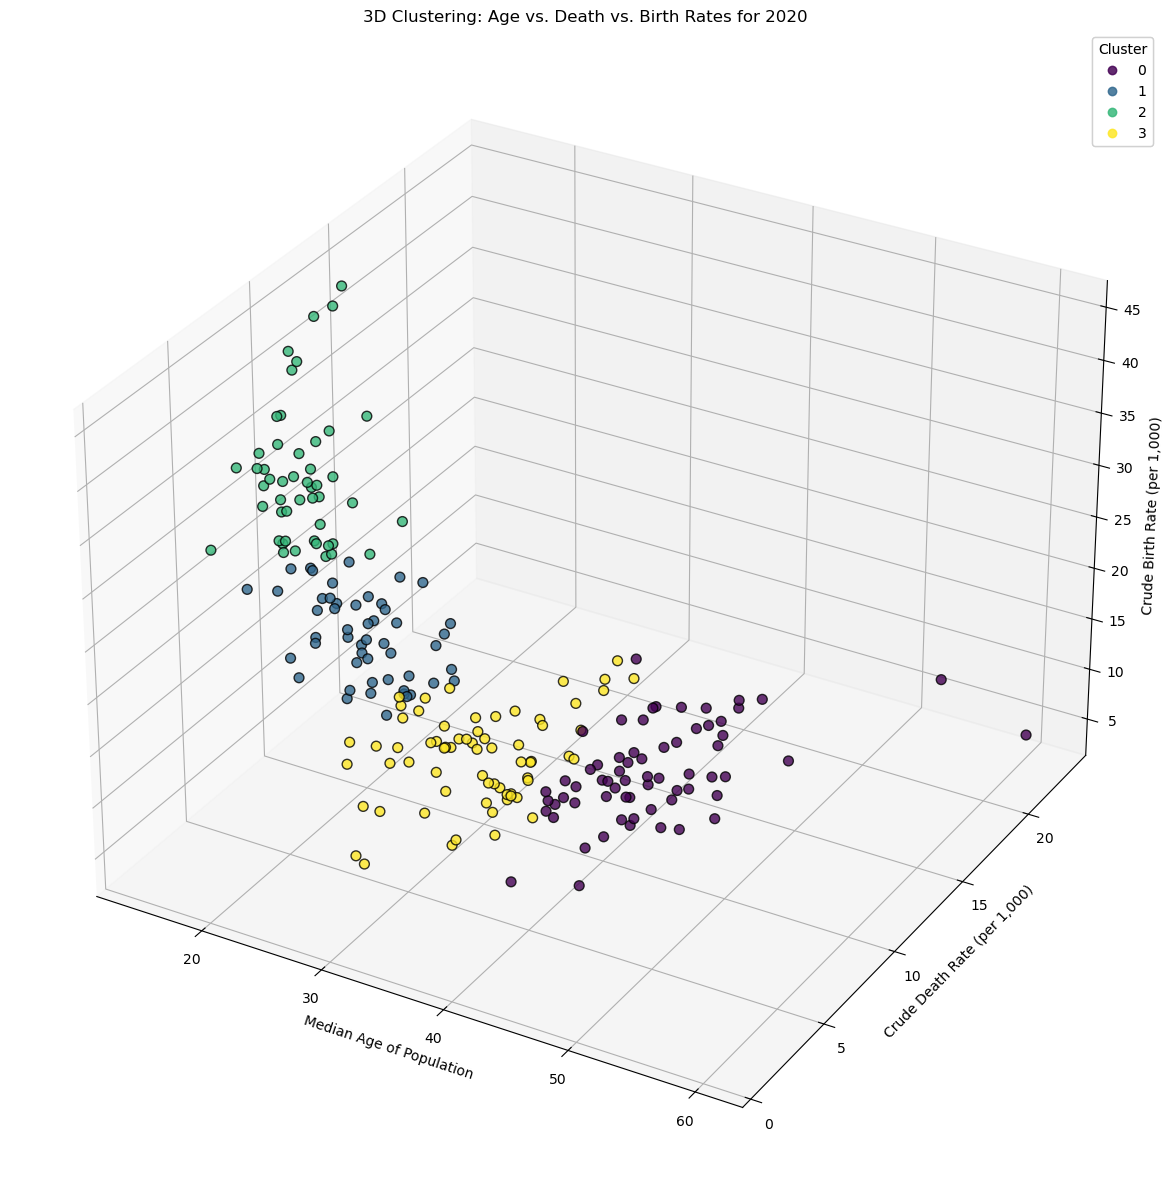

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Extract the three axes and cluster labels
x = df_2020_cl['MedianAgePop']
y = df_2020_cl['CDR']
z = df_2020_cl['CBR']
clusters = df_2020_cl['clusters']

# Set up the figure and 3D axis
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter, coloring by cluster
scatter = ax.scatter(
    x, y, z,
    c=clusters,
    cmap='viridis',
    s=50,
    alpha=0.8,
    edgecolor='k'
)

# Label axes
ax.set_xlabel('Median Age of Population')
ax.set_ylabel('Crude Death Rate (per 1,000)')
ax.set_zlabel('Crude Birth Rate (per 1,000)')
ax.set_title('3D Clustering: Age vs. Death vs. Birth Rates for 2020')

# Add a legend for the clusters
legend1 = ax.legend(
    *scatter.legend_elements(),
    title='Cluster'
)
ax.add_artist(legend1)

plt.tight_layout()
plt.show()


In [39]:
# Copy original and define features
df = df_UN.copy()
features = ['MedianAgePop', 'CDR', 'CBR']

# Cluster each year separately
def assign_clusters(group):
    kmeans = KMeans(n_clusters=4, random_state=42)
    group['clusters'] = kmeans.fit_predict(group[features]).astype(str)
    return group

df = df.groupby('Time', group_keys=False).apply(assign_clusters)


C:\Users\ryani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [40]:
import plotly.express as px

# Ensure clusters are strings for discrete coloring
df['clusters'] = df['clusters'].astype(str)

fig = px.scatter_3d(
    df,
    x='MedianAgePop',
    y='CDR',
    z='CBR',
    color='clusters',
    animation_frame='Time',  # Changed from 'Year' to 'Time' which exists in the dataframe
    hover_data=['LEx', 'MAC'],
    title='3D Clustering Over Time: Age vs Death vs Birth Rates',
    width=900,
    height=700,
)

# Tweak marker styling
fig.update_traces(
    marker=dict(
        size=6,
        opacity=0.8,
        line=dict(width=0.5, color='DarkSlateGrey')
    )
)

# Axis labels & legend
fig.update_layout(
    scene=dict(
        xaxis_title='Median Age of Population',
        yaxis_title='Crude Death Rate (per 1,000)',
        zaxis_title='Crude Birth Rate (per 1,000)'
    ),
    legend_title_text='Cluster'
)

fig.show()

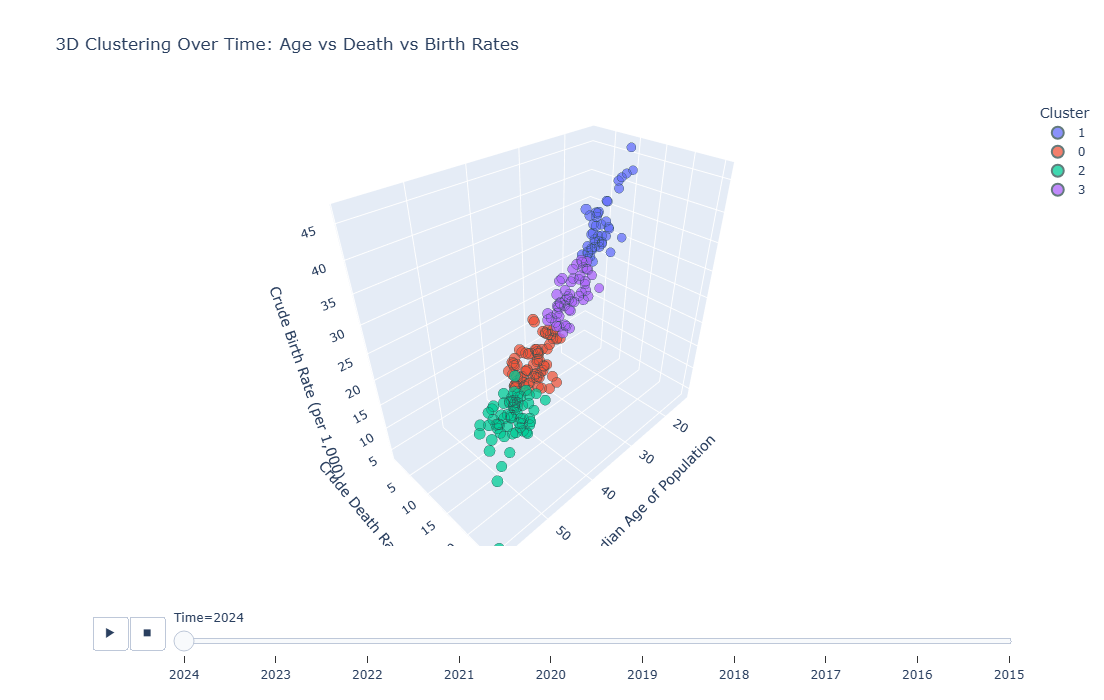

In [41]:
import plotly.express as px

# Make sure 'clusters' is categorical
df['clusters'] = df['clusters'].astype(str)

fig = px.scatter_3d(
    df,
    x='MedianAgePop',
    y='CDR',
    z='CBR',
    color='clusters',
    size='LEx',             # Map marker size to life expectancy
    size_max=18,            # Maximum marker radius
    animation_frame='Time',
    hover_data=['MAC'],     # You still see Mean Age at Childbearing on hover
    title='3D Clustering Over Time: Age vs Death vs Birth Rates',
    width=900,
    height=700,
)

# Refine marker opacity and outline
fig.update_traces(
    marker=dict(
        opacity=0.75,
        line=dict(width=0.5, color='DarkSlateGrey')
    )
)

# Tidy up axis titles and legend
fig.update_layout(
    scene=dict(
        xaxis_title='Median Age of Population',
        yaxis_title='Crude Death Rate (per 1,000)',
        zaxis_title='Crude Birth Rate (per 1,000)'
    ),
    legend_title_text='Cluster'
)

fig.show()


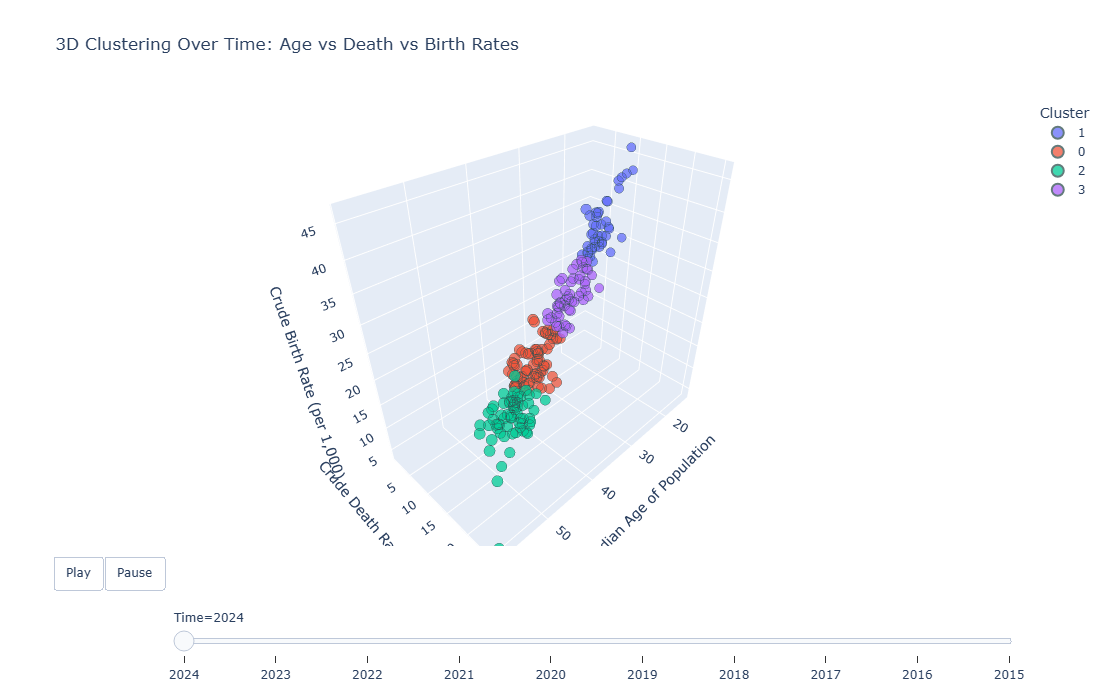

In [42]:
import plotly.express as px

# Ensure 'clusters' is categorical
df['clusters'] = df['clusters'].astype(str)

# Build the animated 3D scatter
fig = px.scatter_3d(
    df,
    x='MedianAgePop',
    y='CDR',
    z='CBR',
    color='clusters',
    size='LEx',
    size_max=18,
    animation_frame='Time',
    hover_data=['MAC'],
    title='3D Clustering Over Time: Age vs Death vs Birth Rates',
    width=900,
    height=700,
)

# Refine marker styling
fig.update_traces(
    marker=dict(
        opacity=0.75,
        line=dict(width=0.5, color='DarkSlateGrey')
    )
)

# Add Play/Pause buttons
fig.update_layout(
    updatemenus=[
        {
            "type": "buttons",
            "direction": "left",
            "buttons": [
                {
                    "args": [None, 
                             {"frame": {"duration": 500, "redraw": True},
                              "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], 
                             {"frame": {"duration": 0, "redraw": False},
                              "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "pad": {"r": 10, "t": 10},
            "showactive": False,
            "x": 0.1,
            "y": 0,
            "xanchor": "right",
            "yanchor": "top"
        }
    ],
    scene=dict(
        xaxis_title='Median Age of Population',
        yaxis_title='Crude Death Rate (per 1,000)',
        zaxis_title='Crude Birth Rate (per 1,000)'
    ),
    legend_title_text='Cluster'
)

fig.show()

In [43]:
fig.write_html('animated_cluster_playpause.html')